In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy.io import fits

In [3]:
V651Cas = fits.open("V651Cas/V651Cas-001_B.fit.gz")

In [4]:
V651Cas

In [5]:
V651Cas.info()

Filename: V651Cas/V651Cas-001_B.fit.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      46   (1024, 1024)   int16 (rescales to uint16)   


In [6]:
V651Cas[0]

In [7]:
V651Cas[0].header

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1024 /fastest changing axis                           
NAXIS2  =                 1024 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2017-07-10T21:24:10' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   60.000000000000000 /Exposure time in seconds                        
EXPOSURE=   60.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.311681500000002 /CCD temperature at start of exposure in C       
XPIXSZ  =   13.0000000000000

In [8]:
data = V651Cas[0].data
data = data.astype(np.float64)

In [9]:
type(data)

numpy.ndarray

In [10]:
data.shape

(1024, 1024)

In [11]:
data.dtype.name

'float64'

In [12]:
print("Min:", np.min(data))
print("Max:", np.max(data))
print("Mean:", np.mean(data))
print("StvDev:", np.std(data))

Min: 1291.0
Max: 65535.0
Mean: 1439.3405151367188
StvDev: 192.13447945272085


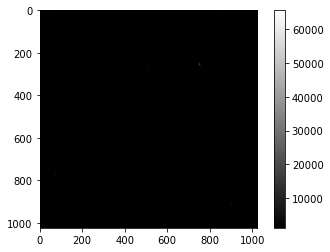

In [13]:
plt.imshow(data, cmap="gray")
plt.colorbar()

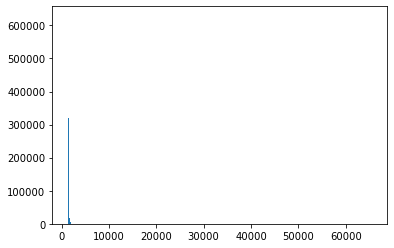

In [14]:
histogram = plt.hist(data.flat, bins=500)

In [32]:
V651CasU = fits.open("V651Cas/V651Cas-001_V.fit.gz")
V651CasI = fits.open("V651Cas/V651Cas-001_I.fit.gz")
V651CasG = fits.open("V651Cas/V651Cas-001_R.fit.gz")

In [37]:
from astropy.visualization import make_lupton_rgb
i = V651CasI[0].data
i = i.astype(np.float64)
g = V651CasG[0].data
g = g.astype(np.float64)
u = V651CasU[0].data
u = u.astype(np.float64)


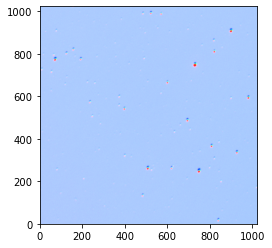

In [38]:
rgb_default = make_lupton_rgb(i, g, u, stretch = 1.5, Q = 10)
plt.imshow(rgb_default, origin = "lower")
plt.savefig("rgbStar.png")